# Introduction

Bienvenue dans ce notebook dédié au patching des instructions IL (Intermediate Language) dans le décompilateur **Binary Ninja** !! <br>

L'objectif principal de ce module est d'explorer les possibilités de réécriture des analyses fournies par Binary Ninja afin d'y ajouter des fonctionnalités personnalisées. <br>
Dans notre contexte, cela inclut notamment des manipulations proches de ce que fait d810 avec le **Microcode** d'IDA Pro.

Le but ultime est d'examiner si nos modifications influencent l'analyse globale et ses résultats. <br>
Pour une approche méthodique et structurée, le contenu de ce notebook est organisé en plusieurs sections claires.

## Plan

1. [L'Intermediate Language (IL) dans Binary Ninja](#LIntermediate-Language-(IL)-dans-Binary-Ninja)
2. [Visualisation des instructions IL](#Visualisation-des-instructions-IL)
3. [Parcours et analyse de fonctions](#Parcours-et-analyse-de-fonctions)
4. [Patching basique](#Patching-basique)

## L'Intermediate Language (IL) dans Binary Ninja

Binary Ninja uses several intermediate languages (ILs) to represent binary code at different levels of abstraction. <br>
The Low-Level Intermediate Language (LLIL) is a crucial part of this infrastructure, providing a detailed and precise representation of binary instructions. <br>

* LLIL Overview: LLIL is a machine-independent representation of binary instructions, designed to facilitate binary analysis.
* Importance of LLIL: LLIL enables fine-grained analysis and manipulation of binary code, making it an essential tool for reverse engineering and binary patching.

![overview](https://docs.binary.ninja/img/BNIL-overview.png)

> [!WARNING] 
> Binary Ninja has a very good user documentation that you can read to find out more about BNIL. 
> Link: https://docs.binary.ninja/dev/bnil-overview.html

## Visualisation des instructions IL

Pour une compréhension optimale des concepts, l'utilisation de schémas, de graphiques ou de supports visuels s'avère souvent bien plus efficace. Ainsi, afin d'illustrer concrètement le fonctionnement de l'Intermediate Language (IL) dans Binary Ninja, nous allons nous concentrer sur des fonctions simples mettant en œuvre des notions élémentaires d'arithmétique ainsi qu'un peu de langage C.

Ces fonctions incluront des éléments tels que des boucles, la récursivité, des macros ou encore des appels à `printf`. <br>
L'objectif ici est d'implémenter quelques routines permettant d'extraire et d'afficher les informations clés du Low-Level IL (LLIL). <br>

Ces informations incluent, entre autres :
- Les **opérations** effectuées,
- Les **flags** modifiés ou utilisés,
- Les **registres** manipulés,
- Les **instructions** analysées.

Ces données sont essentielles pour comprendre et représenter les interactions et le flux de contrôle qui seront examinés dans les sections suivantes. <br>
Cette approche visuelle et interactive permettra également de mieux appréhender le rôle de chaque instruction dans l'analyse globale. 

<br><br>
Cette fonction imprime une indentation (sous forme de 4 espaces) en fonction du niveau spécifié par le paramètre indent. Elle est utilisée pour organiser la sortie textuelle de manière hiérarchique et lisible.

In [ ]:
void PrintIndent(const size_t indent) {
    for (size_t i = 0; i < indent; i++)
        printf("    ");
}

<br><br>
Cette macro facilite l'affichage des noms des opérations. Elle prend une opération comme paramètre, et son utilisation dans un switch permet d'imprimer directement le nom de l'opération en tant que chaîne de caractères. Cela améliore la lisibilité et réduit les répétitions dans le code.

In [ ]:
#define ENUM_PRINTER(op) \
    case op: \
        printf(#op); \
        break;

<br><br>
Cette fonction utilise la macro ENUM_PRINTER pour afficher le nom d'une opération BNLowLevelILOperation. Si l'opération est invalide, elle affiche un message indiquant que l'opération n'est pas reconnue.

In [ ]:
void PrintOperation(const BNLowLevelILOperation operation) {
    switch (operation) {
        ENUM_PRINTER(LLIL_NOP)
        ENUM_PRINTER(LLIL_SET_REG)
        ENUM_PRINTER(LLIL_SET_REG_SPLIT)
        ENUM_PRINTER(LLIL_SET_FLAG)
        ENUM_PRINTER(LLIL_LOAD)
        ENUM_PRINTER(LLIL_STORE)
        ENUM_PRINTER(LLIL_PUSH)
        ENUM_PRINTER(LLIL_POP)
        ENUM_PRINTER(LLIL_REG)
        ENUM_PRINTER(LLIL_CONST)
        ENUM_PRINTER(LLIL_CONST_PTR)
        ENUM_PRINTER(LLIL_EXTERN_PTR)
        ENUM_PRINTER(LLIL_FLAG)
        ENUM_PRINTER(LLIL_FLAG_BIT)
        ENUM_PRINTER(LLIL_ADD)
        ENUM_PRINTER(LLIL_ADC)
        ENUM_PRINTER(LLIL_SUB)
        ENUM_PRINTER(LLIL_SBB)
        ENUM_PRINTER(LLIL_AND)
        ENUM_PRINTER(LLIL_OR)
        ENUM_PRINTER(LLIL_XOR)
        ENUM_PRINTER(LLIL_LSL)
        ENUM_PRINTER(LLIL_LSR)
        ENUM_PRINTER(LLIL_ASR)
        ENUM_PRINTER(LLIL_ROL)
        ENUM_PRINTER(LLIL_RLC)
        ENUM_PRINTER(LLIL_ROR)
        ENUM_PRINTER(LLIL_RRC)
        ENUM_PRINTER(LLIL_MUL)
        ENUM_PRINTER(LLIL_MULU_DP)
        ENUM_PRINTER(LLIL_MULS_DP)
        ENUM_PRINTER(LLIL_DIVU)
        ENUM_PRINTER(LLIL_DIVU_DP)
        ENUM_PRINTER(LLIL_DIVS)
        ENUM_PRINTER(LLIL_DIVS_DP)
        ENUM_PRINTER(LLIL_MODU)
        ENUM_PRINTER(LLIL_MODU_DP)
        ENUM_PRINTER(LLIL_MODS)
        ENUM_PRINTER(LLIL_MODS_DP)
        ENUM_PRINTER(LLIL_NEG)
        ENUM_PRINTER(LLIL_NOT)
        ENUM_PRINTER(LLIL_SX)
        ENUM_PRINTER(LLIL_ZX)
        ENUM_PRINTER(LLIL_LOW_PART)
        ENUM_PRINTER(LLIL_JUMP)
        ENUM_PRINTER(LLIL_JUMP_TO)
        ENUM_PRINTER(LLIL_CALL)
        ENUM_PRINTER(LLIL_CALL_STACK_ADJUST)
        ENUM_PRINTER(LLIL_TAILCALL)
        ENUM_PRINTER(LLIL_RET)
        ENUM_PRINTER(LLIL_NORET)
        ENUM_PRINTER(LLIL_IF)
        ENUM_PRINTER(LLIL_GOTO)
        ENUM_PRINTER(LLIL_FLAG_COND)
        ENUM_PRINTER(LLIL_CMP_E)
        ENUM_PRINTER(LLIL_CMP_NE)
        ENUM_PRINTER(LLIL_CMP_SLT)
        ENUM_PRINTER(LLIL_CMP_ULT)
        ENUM_PRINTER(LLIL_CMP_SLE)
        ENUM_PRINTER(LLIL_CMP_ULE)
        ENUM_PRINTER(LLIL_CMP_SGE)
        ENUM_PRINTER(LLIL_CMP_UGE)
        ENUM_PRINTER(LLIL_CMP_SGT)
        ENUM_PRINTER(LLIL_CMP_UGT)
        ENUM_PRINTER(LLIL_TEST_BIT)
        ENUM_PRINTER(LLIL_BOOL_TO_INT)
        ENUM_PRINTER(LLIL_ADD_OVERFLOW)
        ENUM_PRINTER(LLIL_SYSCALL)
        ENUM_PRINTER(LLIL_BP)
        ENUM_PRINTER(LLIL_TRAP)
        ENUM_PRINTER(LLIL_UNDEF)
        ENUM_PRINTER(LLIL_UNIMPL)
        ENUM_PRINTER(LLIL_UNIMPL_MEM)
        ENUM_PRINTER(LLIL_SET_REG_SSA)
        ENUM_PRINTER(LLIL_SET_REG_SSA_PARTIAL)
        ENUM_PRINTER(LLIL_SET_REG_SPLIT_SSA)
        ENUM_PRINTER(LLIL_REG_SPLIT_DEST_SSA)
        ENUM_PRINTER(LLIL_REG_SSA)
        ENUM_PRINTER(LLIL_REG_SSA_PARTIAL)
        ENUM_PRINTER(LLIL_SET_FLAG_SSA)
        ENUM_PRINTER(LLIL_FLAG_SSA)
        ENUM_PRINTER(LLIL_FLAG_BIT_SSA)
        ENUM_PRINTER(LLIL_CALL_SSA)
        ENUM_PRINTER(LLIL_SYSCALL_SSA)
        ENUM_PRINTER(LLIL_TAILCALL_SSA)
        default:
            printf("<invalid operation %" PRId32 ">", operation);
            break;
    }
}

<br><br>
Cette fonction affiche une condition sur les drapeaux (flags) d'une instruction IL (Intermediate Language). Elle utilise également la macro ENUM_PRINTER pour simplifier le code.

In [ ]:
void PrintFlagCondition(const BNLowLevelILFlagCondition cond) {
    switch (cond) {
        ENUM_PRINTER(LLFC_E)
        ENUM_PRINTER(LLFC_NE)
        ENUM_PRINTER(LLFC_SLT)
        ENUM_PRINTER(LLFC_ULT)
        ENUM_PRINTER(LLFC_SLE)
        ENUM_PRINTER(LLFC_ULE)
        ENUM_PRINTER(LLFC_SGE)
        ENUM_PRINTER(LLFC_UGE)
        ENUM_PRINTER(LLFC_SGT)
        ENUM_PRINTER(LLFC_UGT)
        ENUM_PRINTER(LLFC_NEG)
        ENUM_PRINTER(LLFC_POS)
        ENUM_PRINTER(LLFC_O)
        ENUM_PRINTER(LLFC_NO)
        default:
            printf("<invalid condition>");
            break;
    }
}

<br><br>
Cette fonction affiche le nom d'un registre donné (reg). Si le registre est temporaire, il est affiché avec un identifiant spécifique (temp). Sinon, elle utilise le nom du registre fourni par l'architecture associée à la fonction.

In [ ]:

void PrintRegister(const LowLevelILFunction* func, const uint32_t reg) {
    if (LLIL_REG_IS_TEMP(reg))
        printf("temp%d", LLIL_GET_TEMP_REG_INDEX(reg));
    else {
        const string name = func->GetArchitecture()->GetRegisterName(reg);
        if (name.empty())
            printf("<no name>");
        else
            printf("%s", name.c_str());
    }
}

<br><br>
Cette fonction affiche le nom d'un drapeau (flag) ou sa valeur temporaire, si applicable. Cela permet d'identifier précisément les drapeaux utilisés dans une instruction IL.

In [ ]:
void PrintFlag(const LowLevelILFunction* func, const uint32_t flag) {
    if (LLIL_REG_IS_TEMP(flag))
        printf("cond:%d", LLIL_GET_TEMP_REG_INDEX(flag));
    else {
        const string name = func->GetArchitecture()->GetFlagName(flag);
        if (name.empty())
            printf("<no name>");
        else
            printf("%s", name.c_str());
    }
}

<br><br>
Cette fonction analyse et affiche récursivement les expressions IL d'une instruction. <br>
Elle imprime l'opération principale, les opérandes (entiers, registres, drapeaux, conditions, etc.) et applique une indentation pour refléter la structure hiérarchique de l'expression.

In [ ]:
void PrintILExpr(const LowLevelILInstruction& instr, size_t indent) {
    PrintIndent(indent);
    PrintOperation(instr.operation);
    printf("\n");

    indent++;

    for (auto& operand : instr.GetOperands()) {
        switch (operand.GetType()) {
            case IntegerLowLevelOperand:
                PrintIndent(indent);
                printf("int 0x%" PRIx64 "\n", operand.GetInteger());
                break;

            case IndexLowLevelOperand:
                PrintIndent(indent);
                printf("index %" PRIdPTR "\n", operand.GetIndex());
                break;

            case ExprLowLevelOperand:
                PrintILExpr(operand.GetExpr(), indent);
                break;

            case RegisterLowLevelOperand:
                PrintIndent(indent);
                printf("reg ");
                PrintRegister(instr.function, operand.GetRegister());
                printf("\n");
                break;

            case FlagLowLevelOperand:
                PrintIndent(indent);
                printf("flag ");
                PrintFlag(instr.function, operand.GetFlag());
                printf("\n");
                break;

            case FlagConditionLowLevelOperand:
                PrintIndent(indent);
                printf("flag condition ");
                PrintFlagCondition(operand.GetFlagCondition());
                printf("\n");
                break;

            case SSARegisterLowLevelOperand:
                PrintIndent(indent);
                printf("ssa reg ");
                PrintRegister(instr.function, operand.GetSSARegister().reg);
                printf("#%" PRIdPTR "\n", operand.GetSSARegister().version);
                break;

            case SSAFlagLowLevelOperand:
                PrintIndent(indent);
                printf("ssa flag ");
                PrintFlag(instr.function, operand.GetSSAFlag().flag);
                printf("#%" PRIdPTR " ", operand.GetSSAFlag().version);
                break;

            case IndexListLowLevelOperand:
                PrintIndent(indent);
                printf("index list ");
                for (auto i : operand.GetIndexList())
                    printf("%" PRIdPTR " ", i);
                printf("\n");
                break;

            case SSARegisterListLowLevelOperand:
                PrintIndent(indent);
                printf("ssa reg list ");
                for (auto i : operand.GetSSARegisterList()) {
                    PrintRegister(instr.function, i.reg);
                    printf("#%" PRIdPTR " ", i.version);
                }
                printf("\n");
                break;

            case SSAFlagListLowLevelOperand:
                PrintIndent(indent);
                printf("ssa reg list ");
                for (auto i : operand.GetSSAFlagList()) {
                    PrintFlag(instr.function, i.flag);
                    printf("#%" PRIdPTR " ", i.version);
                }
                printf("\n");
                break;

            default:
                PrintIndent(indent);
                printf("<invalid operand>\n");
                break;
        }
    }
}

<br><br>

En résumé, ce code est conçu pour analyser et afficher de manière détaillée les instructions IL bas-niveau dans une fonction, en mettant en évidence les opérations, les registres, les drapeaux, les constantes et les relations hiérarchiques. Il est particulièrement utile pour comprendre et déboguer des programmes analysés avec Binary Ninja, mais n'implique pas de complexité particulière.

## Parcours et analyse de fonctions

Dès à présent place à l'utilisation de BinaryNinja et de nos petites fonctions d'affichage. <br>
Même si nous sommes dans un contexte de recherche sur la deobfuscation, nous allons tout d'abord nous pencher sur des cas d'utilisations bien simple (cf. la fonction suivante)

In [ ]:
#include <stdio.h>
#include <stdlib.h>

int main(int argc, char* argv[])
{
    if(argc != 3) {
        printf("Usage: %s <n1> <n2>\n", argv[0]);
        return 1;
    }
    
    int a = atoi(argv[1]), b = atoi(argv[2]);
    printf("The result is %d\n", a + b);

    return 0;
}

Pour compiler le programme précédant: `gcc add.c -o add`

Notre but ici sera d'analyser le LLIL de cette fonction réalisant une addition entre deux entrées utilisateur. <br>
Vous pouvez bien évidemment tester le programme en locale (si l'envie vous prend) ce qui devrait donner ceci:

```bash
./add 1 -2
> The result is -1
```

A l'aide de GDB et de la commande `disass` nous obtenons un dump de l'assembleur x86_64 de notre programme pour la fonction main

In [ ]:
0x0000000000001169 <+0>:	endbr64 
0x000000000000116d <+4>:	push   rbp
0x000000000000116e <+5>:	mov    rbp,rsp
0x0000000000001171 <+8>:	sub    rsp,0x20
0x0000000000001175 <+12>:	mov    DWORD PTR [rbp-0x14],edi
0x0000000000001178 <+15>:	mov    QWORD PTR [rbp-0x20],rsi
0x000000000000117c <+19>:	cmp    DWORD PTR [rbp-0x14],0x3
0x0000000000001180 <+23>:	je     0x11a7 <main+62>
0x0000000000001182 <+25>:	mov    rax,QWORD PTR [rbp-0x20]
0x0000000000001186 <+29>:	mov    rax,QWORD PTR [rax]
0x0000000000001189 <+32>:	mov    rsi,rax
0x000000000000118c <+35>:	lea    rax,[rip+0xe71]        # 0x2004
0x0000000000001193 <+42>:	mov    rdi,rax
0x0000000000001196 <+45>:	mov    eax,0x0
0x000000000000119b <+50>:	call   0x1060 <printf@plt>
0x00000000000011a0 <+55>:	mov    eax,0x1
0x00000000000011a5 <+60>:	jmp    0x11f6 <main+141>
0x00000000000011a7 <+62>:	mov    rax,QWORD PTR [rbp-0x20]
0x00000000000011ab <+66>:	add    rax,0x8
0x00000000000011af <+70>:	mov    rax,QWORD PTR [rax]
0x00000000000011b2 <+73>:	mov    rdi,rax
0x00000000000011b5 <+76>:	call   0x1070 <atoi@plt>
0x00000000000011ba <+81>:	mov    DWORD PTR [rbp-0x8],eax
0x00000000000011bd <+84>:	mov    rax,QWORD PTR [rbp-0x20]
0x00000000000011c1 <+88>:	add    rax,0x10
0x00000000000011c5 <+92>:	mov    rax,QWORD PTR [rax]
0x00000000000011c8 <+95>:	mov    rdi,rax
0x00000000000011cb <+98>:	call   0x1070 <atoi@plt>
0x00000000000011d0 <+103>:	mov    DWORD PTR [rbp-0x4],eax
0x00000000000011d3 <+106>:	mov    edx,DWORD PTR [rbp-0x8]
0x00000000000011d6 <+109>:	mov    eax,DWORD PTR [rbp-0x4]
0x00000000000011d9 <+112>:	add    eax,edx
0x00000000000011db <+114>:	mov    esi,eax
0x00000000000011dd <+116>:	lea    rax,[rip+0xe35]        # 0x2019
0x00000000000011e4 <+123>:	mov    rdi,rax
0x00000000000011e7 <+126>:	mov    eax,0x0
0x00000000000011ec <+131>:	call   0x1060 <printf@plt>
0x00000000000011f1 <+136>:	mov    eax,0x0
0x00000000000011f6 <+141>:	leave  
0x00000000000011f7 <+142>:	ret


On observe que l'addition (la fonctionnalité principal de notre programme) s'effectue à l'addresse `11d9`  où l'on retrouve une addition entre:
* une valeur chargée précédemment dans eax (cf. [rbp-0x4]) ;
* une autre valeur chargée dans edx (cf. [rbp-0x8]]).

L'interpretation intermediaire en LLIL de cette manipulation donne quelque chose comme ceci.

In [ ]:
17 @ 000011d0  [rbp - 4 {var_c_1}].d = eax
18 @ 000011d3  edx = [rbp - 8 {var_10_1}].d
19 @ 000011d6  eax = [rbp - 4 {var_c_1}].d
20 @ 000011d9  eax = eax + edx

<br>
Dans Binary Ninja, le Low-Level Intermediate Language (LLIL) est représenté sous forme d'AST (Abstract Syntax Tree, ou Arbre Syntaxique Abstrait). Cette représentation facilite l'analyse des instructions machine en organisant leur structure logique sous forme d'arborescence.

Un AST est une structure en arbre qui représente la syntaxe abstraite d'un programme. Chaque nœud de l'arbre correspond à une opération ou à une instruction, et ses enfants représentent ses opérandes ou ses composants. Contrairement à une simple liste d'instructions, un AST met en évidence les relations hiérarchiques et structurelles entre les différents éléments.

Quelques caractéristiques principales de l'AST dans notre cas:
* Nœuds internes : Représentent les opérations (par exemple, addition, soustraction, chargement de mémoire).
* Feuilles : Représentent les valeurs terminales (comme des constantes ou des registres).
* Hiérarchie : Chaque niveau de l'arbre reflète une étape de l'évaluation ou de l'exécution d'une instruction.

Prenons une instruction simple en assembleur x86 :  

In [ ]:
mov eax, [ebx + 4]

<br>
Dans le LLIL, cette instruction peut être représentée comme un AST :

```log
LLIL_SET_REG 
    reg eax
    LLIL_LOAD
        LLIL_ADD
            LLIL_REG 
                reg ebx
            CONST 4
```

Ou encore

```log
          LLIL_SET_REG
         /           \
    reg: eax      LLIL_LOAD
                        |
                   LLIL_ADD
                  /      \
           LLIL_REG      CONST 4
            |
        reg: ebx
```

<br>
Dans le cadre de l'analyse et de la transformation des expressions arithmétiques ou logiques issues d'une désobfuscation ou d'une optimisation de code, il est souvent nécessaire de parcourir et de manipuler des arbres syntaxiques abstraits (AST). <br>
Le module ast de Python permet de créer des AST à partir d'expressions et de les manipuler de manière structurée.<br><br>

L'une des méthodes les plus efficaces pour explorer et transformer ces structures est le principe du visiteur (**visitor pattern**). <br>
Cette approche consiste à définir une classe qui itère sur les nœuds d'un AST, permettant d'appliquer des modifications ou des analyses spécifiques à certains motifs détectés dans l'arbre. <br><br>

Dans l'exemple suivant, nous utilisons un visiteur pour simplifier une expression complexe typique d'un MBA (Mixed Boolean-Arithmetic), à savoir : `((x ^ 1) + (x & 1))`. <br>
Ce pattern peut être simplifié en une addition simple : `(x + 1)`. Cela est possible grâce à la détection de motifs spécifiques dans les nœuds de l'AST, suivie d'une transformation.

In [14]:
import ast

class SimplifyAddition(ast.NodeTransformer):
    def visit_BinOp(self, node):
        self.generic_visit(node)

        # On recherche le patterne: `((x ^ 1) + (x & 1))`
        if isinstance(node, ast.BinOp) and isinstance(node.op, ast.Add):
            left = node.left # (x ^ 1)
            right = node.right # (x & 1)

            # Verifie si l'enfant gauche est égal à (x ^ 1)
            # On verifie d'abord que l'operateur est un XOR, puis que la gauche est une variable
            if isinstance(left, ast.BinOp) and isinstance(left.op, ast.BitXor) and isinstance(left.left, ast.Name):
                # Ensuite que la droite est une constante de valeur `1`
                if isinstance (left.right, ast.Constant) and left.right.value == 1:
                    xl = left.left # On stock Xl

            # Verifie si l'enfant droit est égal à (x & 1)
            # On verifie d'abord que l'operateur est un AND, puis que la gauche est une variable
            if isinstance(right, ast.BinOp) and isinstance(right.op, ast.BitAnd) and isinstance(right.left, ast.Name):
                # Ensuite que la droite est une constante de valeur `1`
                if isinstance (right.right, ast.Constant) and right.right.value == 1:
                    xr = right.left # On stock Xr
            
            # Nous avons récupéré X à gauche et à droite
            # Vérifions qu'ils aient la même valeur 
            if xl.id == xr.id:
                # On remplace le patterne recherché, par celui simplifié `(x + 1)`
                return ast.BinOp(left=xl, op=ast.Add(), right=ast.Constant(value=1))
        return node

# Exemples
if __name__ == "__main__":
    mba = "((x ^ 1) + (x & 1))"
    tree = ast.parse(mba, mode="eval")
    optz  = SimplifyAddition()
    print(f"Expression MBA : {mba}")
    print("Expression simplifiée : " + ast.unparse(ast.fix_missing_locations(optz.visit(tree))))

Expression MBA : ((x ^ 1) + (x & 1))
Expression simplifiée : x + 1


<br>

L'API BinaryNinja propose l'usage de ces mêmes visiteurs à l'aide de fonction comme `void LowLevelILInstruction::VisitExprs (const std::function<bool(const LowLevelILInstruction &expr)> &func) const`

In [ ]:
void AnalyzeFunction(const Ref<Function>& func) {
    printf("\n"); // prettier

    // Get the name of the function and display it
    Ref<Symbol> sym = func->GetSymbol();
    if (sym)
        printf("Function %s:\n", sym->GetFullName().c_str());
    else
        printf("Function at 0x%" PRIx64 ":\n", func->GetStart());

    // Fetch the low level IL for the function
    Ref<LowLevelILFunction> il = func->GetLowLevelIL();
    if (!il) {
        printf("    Does not have LLIL\n\n");
        return;
    }

    // Loop through all blocks in the function
    for (auto& block : il->GetBasicBlocks()) {
        // Loop though each instruction in the block
        for (size_t instrIndex = block->GetStart(); instrIndex < block->GetEnd(); instrIndex++) {
            // Fetch IL instruction
            LowLevelILInstruction instr = (*il)[instrIndex];

            // Display core's interpretation of the IL instruction
            vector<InstructionTextToken> tokens;
            il->GetInstructionText(func, func->GetArchitecture(), instrIndex, tokens);
            printf("    %" PRIdPTR " @ 0x%" PRIx64 "  ", instrIndex, instr.address);
            for (auto& token : tokens)
                printf("%s", token.text.c_str());
            printf("\n");

            // Generically parse the IL tree and display the parts
            PrintILExpr(instr, 2);

            // Example of using visitors to find all constants in the instruction
            instr.VisitExprs([&](const LowLevelILInstruction& expr) {
                switch (expr.operation) {
                    case LLIL_CONST:
                    case LLIL_CONST_PTR:
                    case LLIL_EXTERN_PTR:
                        printf("        Found constant 0x%" PRIx64 "\n", expr.GetConstant());
                        return false;  // Done parsing this
                    default:
                        break;
                }
                return true;  // Parse any subexpressions
            });

            // Example of using the templated accessors for efficiently parsing load instructions
            instr.VisitExprs([&](const LowLevelILInstruction& expr) {
                switch (expr.operation) {
                    case LLIL_LOAD:
                        if (expr.GetSourceExpr<LLIL_LOAD>().operation == LLIL_CONST_PTR) {
                            printf("        Loading from address 0x%" PRIx64 "\n",
                                expr.GetSourceExpr<LLIL_LOAD>().GetConstant<LLIL_CONST_PTR>());
                            return false;  // Done parsing this
                        }
                        else if (expr.GetSourceExpr<LLIL_LOAD>().operation == LLIL_EXTERN_PTR) {
                            printf("        Loading from address 0x%" PRIx64 "\n",
                                expr.GetSourceExpr<LLIL_LOAD>().GetConstant<LLIL_EXTERN_PTR>());
                            return false;  // Done parsing this
                        }
                        break;
                    default:
                        break;
                }
                return true;  // Parse any subexpressions
            });
        }
    }

    printf("\n");
}

In [ ]:
// On applique la fonction AnalyzeFunction à toute les fonctions disponibles sur la vue actuelle
void Test(BinaryView *bv) {
    for (auto& func : bv->GetAnalysisFunctionList()) {
        AnalyzeFunction(func);
    }
}

<br>
Mais nous pouvons également choisir de parcourir chaque basic block d'une fonction en particulier ainsi que les instructions la composant et rechercher le patterne de nous même sans ses visiteurs:

In [ ]:
void Test2(BinaryView *bv) {
    for (auto& func : bv->GetAnalysisFunctionList()) {
        Ref<Symbol> sym = func->GetSymbol();
        printf("%s", sym->GetFullName().c_str());

        if (sym->GetFullName() == "main") {
            Ref<LowLevelILFunction> il = func->GetLowLevelIL();
            if (!il) {
                printf("    Does not have LLIL\n\n");
                return;
            }

            for (auto& block : il->GetBasicBlocks()) {
                for (size_t instrIndex = block->GetStart(); instrIndex < block->GetEnd(); instrIndex++) {
                    LowLevelILInstruction instr = (*il)[instrIndex];
                    if (instr.operation == LLIL_SET_REG) {
                        auto srcExpr = instr.GetSourceExpr<LLIL_SET_REG>();
                        if (srcExpr.operation == LLIL_ADD) {
                            auto leftExpr = srcExpr.GetLeftExpr<LLIL_ADD>();
                            auto rightExpr = srcExpr.GetRightExpr<LLIL_ADD>();
                            if (leftExpr.operation == LLIL_REG && rightExpr.operation == LLIL_REG) {
                                printf("\nProcessing instruction at 0x%" PRIx64 " with operation %d at block 0x%" PRIx64 "\n", instr.address, instr.operation, block->GetStart());
                                PrintILExpr(instr, 2);
                            }
                        }
                    }
                }
            }
        }
    }
}

<br>

Ici, la fonction `Test` permet d'afficher le LLIL de toute les fonctions sur la vue actuelle et la fonction `Test2` isole le patterne suivant

```log
Processing instruction at 0x11d9 with operation 1 at block 0x6
        LLIL_SET_REG
            reg eax
            LLIL_ADD
                LLIL_REG
                    reg eax
                LLIL_REG
                    reg edx
```

Afin d'utiliser ces deux fonctions au sein de BinaryNinja nous nous devons de les enregistrés comme ci:

In [ ]:
extern "C"
{
    /**
     * @brief Get the core plugin ABI version.
     * @return The core plugin ABI version.
     */
    BINARYNINJAPLUGIN uint32_t CorePluginABIVersion() { return BN_CURRENT_CORE_ABI_VERSION; }

    /**
     * @brief Initialize the core plugin.
     * @return True if initialization is successful, false otherwise.
     */
    BINARYNINJAPLUGIN bool CorePluginInit()
    {
        PluginCommand::Register("eshard\\Test", "Print LLIL of all function using visitor", Test);
        PluginCommand::Register("eshard\\Test2", "Isolate an ADD manipulation in the main function with only for loops", Test2);

        return true;
    }
}

<br><br>

## Patchning basique

Maintenant que nous savons rechercher un patterne dans une fonction donnée, il ne nous manque plus qu'à effectuer les modifications que l'on souhaite et dans notre cas remplacer le ADD par un MUL...

Ce qui devrait nous donner quelque chose comme ceci
```log
Processing instruction at 0x11d9 with operation 1 at block 0x6
        LLIL_SET_REG
            reg eax
            LLIL_MUL
                LLIL_REG
                    reg eax
                LLIL_REG
                    reg edx
```

<br><br>
Ce qui donnerai en toute logique le resultat suivant sur de l'assembleur

In [ ]:
17 @ 000011d0  [rbp - 4 {var_c_1}].d = eax
18 @ 000011d3  edx = [rbp - 8 {var_10_1}].d
19 @ 000011d6  eax = [rbp - 4 {var_c_1}].d
20 @ 000011d9  eax = eax * edx

<br><br>
La fonction suivante recherche le patterne que nous avons vu précédemment (comme pour `Test2`) et effectue le remplacement de l'expression `ADD` par une expression `MUL`

In [ ]:
void Test4(const Ref<AnalysisContext> &analysisContext) {
    const Ref<Function> func = analysisContext->GetFunction();
    const Ref<Symbol> sym = func->GetSymbol();
    printf("%s", sym->GetFullName().c_str());

    if (sym->GetFullName() == "main") {
        const Ref<LowLevelILFunction> il = func->GetLowLevelIL();
        if (!il) {
            printf("    Does not have LLIL\n\n");
            return;
        }

        for (auto& block : il->GetBasicBlocks()) {
            for (size_t instrIndex = block->GetStart(); instrIndex < block->GetEnd(); instrIndex++) {
                LowLevelILInstruction instr = (*il)[instrIndex];
                if (instr.operation == LLIL_SET_REG) {
                    auto srcExpr = instr.GetSourceExpr<LLIL_SET_REG>();

                    if (srcExpr.operation == LLIL_ADD) {
                        auto leftExpr = srcExpr.GetLeftExpr<LLIL_ADD>();
                        auto rightExpr = srcExpr.GetRightExpr<LLIL_ADD>();

                        if (leftExpr.operation == LLIL_REG && rightExpr.operation == LLIL_REG) {
                            printf("\nProcessing instruction at 0x%" PRIx64 " with operation %d at block 0x%" PRIx64 "\n", instr.address, instr.operation, block->GetStart());
                            PrintILExpr(instr, 2);

                            const ExprId newInstr = il->AddExpr(
                                LLIL_MUL, srcExpr.size, srcExpr.flags,
                                il->Register(leftExpr.size, leftExpr.GetSourceRegister()),
                                il->Register(rightExpr.size, rightExpr.GetSourceRegister())
                            );

                            il->ReplaceExpr(srcExpr.exprIndex, newInstr);
                            PrintILExpr(instr, 2);
                        }
                    }
                }
            }
        }
    }
}

<br><br>
Cependant, afin de réecrire des instructions il faut s'attacher à l'analyse de binary ninja, ce qu'on appelle les workflows et les activités.

In [ ]:
const Ref<Workflow> customPatcherWorkflow = Workflow::Instance("core.function.baseAnalysis")->Clone("PatcherWorkflow");
customPatcherWorkflow->RegisterActivity(new Activity("extension.patcher", &Test4));
customPatcherWorkflow->Insert("core.function.generateMediumLevelIL", "extension.patcher");
Workflow::RegisterWorkflow(customPatcherWorkflow,
    R"#({
        "title" : "Test4",
        "description" : "This analysis stands in as an example to demonstrate Binary Ninja's extensible analysis APIs.",
        "targetType" : "function"
    })#"
);

<br><br>
Ici `core.function.generateMediumLevelIL` est une activité au sein du workflow `core.function.baseAnalysis`, celle-ci utilise le Lifted IL pour généré le LowLevelIL et ensuite le MediumLevelIL, nous ajoutons notre fonctionnalité sur cette activité afin de modifier le LLIL comme bon nous semble. Voici un code très simple pour lister toute les activités d'un workflow.

In [ ]:
PluginCommand::Register("eshard\\Test3", "Print all activities", [](BinaryView* view) {
    const Ref<Workflow> defaultWf = Workflow::Instance("core.function.baseAnalysis");
    for (const auto& activity : defaultWf->GetSubactivities()) {
        LogInfo("Activity: %s", activity.c_str());
    }
});

<br>
Par exemple, voici toute les activités du workflow `core.function.baseAnalysis`

```log
[Default] Activity: core.function.advancedAnalysis
[Default] Activity: core.function.advancedSelector
[Default] Activity: core.function.analyzeAndExpandFlags
[Default] Activity: core.function.analyzeCachedIndirectStructureReferences
[Default] Activity: core.function.analyzeCallTypes
[Default] Activity: core.function.analyzeCallsites
[Default] Activity: core.function.analyzeConditionalNoReturns
[Default] Activity: core.function.analyzeConstantReferences
[Default] Activity: core.function.analyzeDataVariables
[Default] Activity: core.function.analyzeDisplayTypeTypeReferences
[Default] Activity: core.function.analyzeHLILTypeReferences
[Default] Activity: core.function.analyzeIndirectBranches
[Default] Activity: core.function.analyzeMLILTypeReferences
[Default] Activity: core.function.analyzeReturns
[Default] Activity: core.function.analyzeStackAdjustment
[Default] Activity: core.function.analyzeStackVariableReferences
[Default] Activity: core.function.analyzeSystemCalls
[Default] Activity: core.function.analyzeTailCalls
[Default] Activity: core.function.autoNameVariables
[Default] Activity: core.function.baseAnalysis
[Default] Activity: core.function.basicAnalysis
[Default] Activity: core.function.basicBlockAnalysis
[Default] Activity: core.function.checkForPureFunction
[Default] Activity: core.function.checkForReturn
[Default] Activity: core.function.checkForReturnWithBasicBlocksOnly
[Default] Activity: core.function.commitAnalysisData
[Default] Activity: core.function.controlFlowAnalysis
[Default] Activity: core.function.findStringReferences
[Default] Activity: core.function.finishUpdate
[Default] Activity: core.function.fullAnalysis
[Default] Activity: core.function.generateHighLevelIL
[Default] Activity: core.function.generateLiftedIL
[Default] Activity: core.function.generateMediumLevelIL
[Default] Activity: core.function.intermediateAnalysis
[Default] Activity: core.function.modeSelector
[Default] Activity: core.function.processAnalysisSkip
[Default] Activity: core.function.processCompletionState
[Default] Activity: core.function.processConstantPointerReferences
[Default] Activity: core.function.propagateAnalysis
[Default] Activity: core.function.resetIndirectBranchesOnFullUpdate
[Default] Activity: core.function.runCompletionCallbacks
[Default] Activity: core.function.runFunctionRecognizers
[Default] Activity: core.function.runMainFunctionDetector
[Default] Activity: core.function.translateTailCalls
[Default] Activity: core.function.update
```

<br><br>
Afin que cette nouvelle activité prenne place nous devons sélectionner le workflow à utiliser.
Pour se faire on se rend dans Binary Ninja > Edit > Settings > workflow

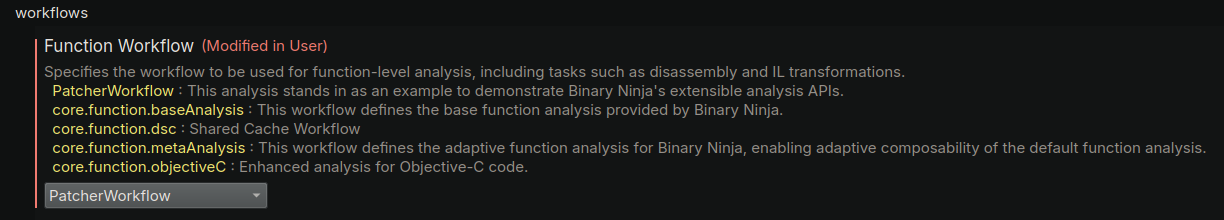


Nous pouvons dès à présent ouvrir le fichier binaire `add` et observons les modifications.

La vue LLIL avant notre analyse modifiée: <br>
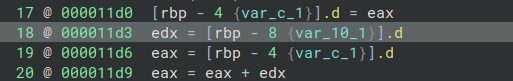

La vue LLIL après notre analyse modifiée: <br>
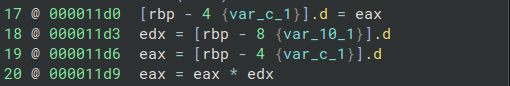

On observe que seul la vue LLIL à subit cette modification, la vue MLIL, HLIL, assembleur, pseudo-C et pseudo-Rust possèdent toujours le ADD initial.

<br>
<br>
<br>
<br>
<br>

PS: Le code présenté dans ce notebook est disponible sur https://github.com/mitsuakki/bninja-recipes